In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# 폰트 설정 방법 2
import matplotlib as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

font_location = r'C:\Windows\Fonts\H2HDRM.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [3]:
all_data_c = pd.read_csv( r'KNN_LABEL_CODE_NAME.csv', encoding = 'cp949' )
all_data_c = all_data_c.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
all_data_c 

,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,...,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,11680,강남구
1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,11710,송파구
2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,11110,종로구
3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,11140,중구
4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,11140,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,11590,동작구
32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,11620,관악구
32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,11620,관악구
32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,11620,관악구


In [4]:
for i in range(0,1496):
    all_data_c = all_data_c.drop(['상권코드_'+str(i)], axis=1)

In [5]:
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.00,2.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,11680,강남구
1,2020.00,2.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,11710,송파구
2,2020.00,2.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,11110,종로구
3,2020.00,2.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,11140,중구
4,2020.00,2.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,11140,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,11590,동작구
32908,2020.00,2.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,11620,관악구
32909,2020.00,2.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,11620,관악구
32910,2020.00,2.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,11620,관악구


In [6]:
all_data_c = all_data_c.drop(['시군구_코드'], axis=1)
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,자치구_명
0,2020.00,2.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,강남구
1,2020.00,2.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,송파구
2,2020.00,2.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,종로구
3,2020.00,2.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,중구
4,2020.00,2.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,동작구
32908,2020.00,2.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,관악구
32909,2020.00,2.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,관악구
32910,2020.00,2.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,관악구


In [7]:
all_data_c_col = all_data_c.columns
all_data_c_col

Index(['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률', '상권_코드', '자치구_명'],
      dtype='object')

In [8]:
from sklearn import preprocessing
for i in range(2,10):
    x = all_data_c[all_data_c_col[i]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(pd.DataFrame(x))
    
    # min_Max 적용
    all_data_c[all_data_c_col[i]] = pd.DataFrame(x_scaled)

In [9]:
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,자치구_명
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,2.59,1001496,강남구
1,2020.00,2.00,0.31,0.04,0.31,0.22,0.50,0.41,0.24,0.14,3.03,1001495,송파구
2,2020.00,2.00,0.41,0.01,0.14,0.05,0.12,0.55,0.40,0.19,2.08,1001494,종로구
3,2020.00,2.00,0.33,0.01,0.18,0.10,0.15,0.28,0.38,0.03,2.11,1001493,중구
4,2020.00,2.00,0.38,0.03,0.29,0.12,0.07,1.00,0.58,0.60,2.16,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.17,0.03,0.01,0.06,0.00,0.00,5.56,1001443,동작구
32908,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1001456,관악구
32909,2020.00,2.00,0.03,0.03,0.29,0.12,0.01,0.00,0.01,0.00,1.49,1001464,관악구
32910,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1001465,관악구


In [10]:
all_data_in = all_data_c.drop(['폐업률'], axis=1)
all_data_in

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,1001496,강남구
1,2020.00,2.00,0.31,0.04,0.31,0.22,0.50,0.41,0.24,0.14,1001495,송파구
2,2020.00,2.00,0.41,0.01,0.14,0.05,0.12,0.55,0.40,0.19,1001494,종로구
3,2020.00,2.00,0.33,0.01,0.18,0.10,0.15,0.28,0.38,0.03,1001493,중구
4,2020.00,2.00,0.38,0.03,0.29,0.12,0.07,1.00,0.58,0.60,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.17,0.03,0.01,0.06,0.00,0.00,1001443,동작구
32908,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,1001456,관악구
32909,2020.00,2.00,0.03,0.03,0.29,0.12,0.01,0.00,0.01,0.00,1001464,관악구
32910,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,1001465,관악구


In [32]:
def four_season_data_in(all_data_in,자치구,y_1,q_1,y_2,q_2,y_3,q_3,y_4,q_4):

    _test = pd.merge(all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_1,q_1)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1),
                     all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_2,q_2)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('-4', '-3'))
    _test = pd.merge(_test,all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_3,q_3)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('', '-2'))
    _test = pd.merge(_test,all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_4,q_4)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('', '-1'))
    return _test

In [33]:
x_predict_2020_2_강남구 = four_season_data_in(all_data_in,'강남구',2019,2,2019,3,2019,4,2020,1)
x_predict_2020_2_강남구

,총_유동인구_수-4,아파트_단지_수-4,아파트_평균_면적-4,아파트_평균_시가-4,총 상주인구 수-4,집객시설_수-4,당월_매출_금액-4,총_직장_인구_수-4,상권_코드,총_유동인구_수-3,...,당월_매출_금액,총_직장_인구_수,총_유동인구_수-1,아파트_단지_수-1,아파트_평균_면적-1,아파트_평균_시가-1,총 상주인구 수-1,집객시설_수-1,당월_매출_금액-1,총_직장_인구_수-1
0,0.01,0.02,0.30,0.19,0.00,0.09,0.27,0.11,1001496,0.01,...,0.34,0.09,0.01,0.02,0.34,0.21,0.00,0.09,0.24,0.09
1,0.00,0.02,0.30,0.19,0.00,0.01,0.00,0.00,1001475,0.00,...,0.00,0.00,0.00,0.02,0.34,0.21,0.00,0.01,0.00,0.00
2,0.03,0.00,0.23,0.20,0.01,0.01,0.01,0.00,1001474,0.03,...,0.02,0.00,0.03,0.00,0.23,0.27,0.01,0.01,0.02,0.00
3,0.00,0.00,0.56,0.66,0.01,0.00,0.00,0.00,1001473,0.01,...,0.00,0.00,0.01,0.02,0.34,0.21,0.01,0.00,0.00,0.00
4,0.00,0.00,0.40,0.18,0.01,0.02,0.00,0.00,1001472,0.01,...,0.01,0.00,0.00,0.00,0.40,0.22,0.01,0.05,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.05,0.07,0.19,0.09,0.15,0.02,0.01,0.00,1000890,0.04,...,0.01,0.00,0.05,0.10,0.18,0.10,0.14,0.02,0.01,0.00
111,0.11,0.14,0.22,0.11,0.22,0.02,0.00,0.01,1000889,0.09,...,0.02,0.01,0.09,0.20,0.20,0.12,0.22,0.02,0.01,0.01
112,0.05,0.03,0.24,0.15,0.11,0.01,0.00,0.01,1000888,0.05,...,0.00,0.01,0.05,0.03,0.22,0.19,0.11,0.01,0.00,0.01
113,0.04,0.06,0.54,0.25,0.08,0.01,0.02,0.03,1000887,0.05,...,0.02,0.03,0.05,0.07,0.51,0.32,0.07,0.01,0.02,0.03


In [13]:
def four_season_data_out(all_data_c,자치구,y_5,q_5):
    
    _test = pd.DataFrame(all_data_c.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_5,q_5))['폐업률'])
    
    return _test

In [14]:
#all_data_out = pd.DataFrame(all_data_c['폐업률'])
y_predict_2020_2_강남구 = four_season_data_out(all_data_c,'강남구',2020,2)
y_predict_2020_2_강남구

,폐업률
0,2.59
20,2.94
21,0.00
22,2.27
23,5.88
...,...
587,0.92
588,1.78
589,1.32
590,1.73


In [15]:
# 4개 분기 묶어서 다음 분기 예측
# 1_분기_x + 2_분기_x + 3_분기_x + 4_분기_x ++ 5_분기_y

# 2015 , 1~4 : X
# 2016 , 1 : Y

In [16]:
list_season = []
for i in range(2015,2020):
    
    for j in range(1,5):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)
        
for i in range(2020,2021):
    
    for j in range(1,3):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)        

print(list_season)

[[2015, 1], [2015, 2], [2015, 3], [2015, 4], [2016, 1], [2016, 2], [2016, 3], [2016, 4], [2017, 1], [2017, 2], [2017, 3], [2017, 4], [2018, 1], [2018, 2], [2018, 3], [2018, 4], [2019, 1], [2019, 2], [2019, 3], [2019, 4], [2020, 1], [2020, 2]]


In [17]:
for i in range(0,18): # 17개의 트레이닝 셋
    print(list_season[i],list_season[i+1],list_season[i+2],list_season[i+3],' // y :',list_season[i+4])
    
    

[2015, 1] [2015, 2] [2015, 3] [2015, 4]  // y : [2016, 1]
[2015, 2] [2015, 3] [2015, 4] [2016, 1]  // y : [2016, 2]
[2015, 3] [2015, 4] [2016, 1] [2016, 2]  // y : [2016, 3]
[2015, 4] [2016, 1] [2016, 2] [2016, 3]  // y : [2016, 4]
[2016, 1] [2016, 2] [2016, 3] [2016, 4]  // y : [2017, 1]
[2016, 2] [2016, 3] [2016, 4] [2017, 1]  // y : [2017, 2]
[2016, 3] [2016, 4] [2017, 1] [2017, 2]  // y : [2017, 3]
[2016, 4] [2017, 1] [2017, 2] [2017, 3]  // y : [2017, 4]
[2017, 1] [2017, 2] [2017, 3] [2017, 4]  // y : [2018, 1]
[2017, 2] [2017, 3] [2017, 4] [2018, 1]  // y : [2018, 2]
[2017, 3] [2017, 4] [2018, 1] [2018, 2]  // y : [2018, 3]
[2017, 4] [2018, 1] [2018, 2] [2018, 3]  // y : [2018, 4]
[2018, 1] [2018, 2] [2018, 3] [2018, 4]  // y : [2019, 1]
[2018, 2] [2018, 3] [2018, 4] [2019, 1]  // y : [2019, 2]
[2018, 3] [2018, 4] [2019, 1] [2019, 2]  // y : [2019, 3]
[2018, 4] [2019, 1] [2019, 2] [2019, 3]  // y : [2019, 4]
[2019, 1] [2019, 2] [2019, 3] [2019, 4]  // y : [2020, 1]
[2019, 2] [201

#### 강남구 폐업률 예측 모델

In [34]:
for i in range(0,18): # 17개의 트레이닝 셋
    
    globals()["x_predict_{}_{}_강남구".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_in(all_data_in,'강남구',
                                                                                                              list_season[i][0],list_season[i][1],
                                                                                                              list_season[i+1][0],list_season[i+1][1],
                                                                                                              list_season[i+2][0],list_season[i+2][1],
                                                                                                              list_season[i+3][0],list_season[i+3][1]
                                                                                                              )
    globals()["y_predict_{}_{}_강남구".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_out(all_data_c,'강남구',
                                                                                                             list_season[i+4][0],list_season[i+4][1])
    #x_predict_2020_2_강남구 = four_season_data_in(all_data_in,'강남구',2019,2,2019,3,2019,4,2020,1)
    #y_predict_2020_2_강남구 = four_season_data_out(all_data_c,'강남구',2020,2)

In [35]:
columns = x_predict_2020_2_강남구.columns
columns

Index(['총_유동인구_수-4', '아파트_단지_수-4', '아파트_평균_면적-4', '아파트_평균_시가-4', '총 상주인구 수-4',
       '집객시설_수-4', '당월_매출_금액-4', '총_직장_인구_수-4', '상권_코드', '총_유동인구_수-3',
       '아파트_단지_수-3', '아파트_평균_면적-3', '아파트_평균_시가-3', '총 상주인구 수-3', '집객시설_수-3',
       '당월_매출_금액-3', '총_직장_인구_수-3', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수',
       '총_유동인구_수-1', '아파트_단지_수-1', '아파트_평균_면적-1', '아파트_평균_시가-1', '총 상주인구 수-1',
       '집객시설_수-1', '당월_매출_금액-1', '총_직장_인구_수-1'],
      dtype='object')

In [37]:
# df 를 vertically concat 하기 위해 append 함
x_in = pd.DataFrame(columns=x_predict_2020_2_강남구.columns)
x_out = pd.DataFrame(columns=y_predict_2020_2_강남구.columns)
for i in range(0,18): # 17개의 트레이닝 셋
    x_in = x_in.append(globals()["x_predict_{}_{}_강남구".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
    x_out = x_out.append(globals()["y_predict_{}_{}_강남구".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
x_in
#x_out

,총_유동인구_수-4,아파트_단지_수-4,아파트_평균_면적-4,아파트_평균_시가-4,총 상주인구 수-4,집객시설_수-4,당월_매출_금액-4,총_직장_인구_수-4,상권_코드,총_유동인구_수-3,...,당월_매출_금액,총_직장_인구_수,총_유동인구_수-1,아파트_단지_수-1,아파트_평균_면적-1,아파트_평균_시가-1,총 상주인구 수-1,집객시설_수-1,당월_매출_금액-1,총_직장_인구_수-1
0,0.01,0.06,0.25,0.11,0.15,0.08,0.25,0.12,1001496,0.01,...,0.24,0.12,0.01,0.03,0.26,0.13,0.16,0.08,0.26,0.12
1,0.00,0.06,0.25,0.11,0.15,0.01,0.01,0.00,1001475,0.00,...,0.01,0.00,0.00,0.03,0.26,0.13,0.17,0.01,0.01,0.00
2,0.01,0.00,0.25,0.18,0.02,0.02,0.02,0.00,1001474,0.01,...,0.02,0.00,0.01,0.00,0.25,0.18,0.02,0.02,0.02,0.00
3,0.01,0.03,0.15,0.06,0.07,0.00,0.02,0.02,1001471,0.01,...,0.02,0.02,0.01,0.04,0.15,0.06,0.07,0.00,0.02,0.02
4,0.18,0.02,0.22,0.11,0.11,0.23,0.24,0.08,1001141,0.18,...,0.23,0.08,0.24,0.02,0.22,0.11,0.20,0.23,0.25,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.05,0.07,0.19,0.09,0.15,0.02,0.01,0.00,1000890,0.04,...,0.01,0.00,0.05,0.10,0.18,0.10,0.14,0.02,0.01,0.00
111,0.11,0.14,0.22,0.11,0.22,0.02,0.00,0.01,1000889,0.09,...,0.02,0.01,0.09,0.20,0.20,0.12,0.22,0.02,0.01,0.01
112,0.05,0.03,0.24,0.15,0.11,0.01,0.00,0.01,1000888,0.05,...,0.00,0.01,0.05,0.03,0.22,0.19,0.11,0.01,0.00,0.01
113,0.04,0.06,0.54,0.25,0.08,0.01,0.02,0.03,1000887,0.05,...,0.02,0.03,0.05,0.07,0.51,0.32,0.07,0.01,0.02,0.03


In [44]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장

X_train, X_test, y_train, y_test= train_test_split(x_in.astype({'상권_코드': 'int32'}), x_out, test_size=0.2, random_state=42)
# train, test 데이터 

# xgboost 학습
globals()["xgb_5000_{}".format('강남구')] = XGBRegressor( objective ='reg:squarederror', n_estimators=7500, learning_rate=0.001 ,
                  max_depth=20, n_jobs = -1, gamma=0, subsample=0.75, colsample_bytree=1,)
globals()["xgb_5000_{}".format('강남구')].fit(X_train,y_train)
globals()["xgb_5000_{}_pred".format('강남구')] = globals()["xgb_5000_{}".format('강남구')].predict(X_test)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

NameError: name 'rmse' is not defined

In [39]:
feature_important = xgb_5000_강남구.get_booster().get_score(importance_type='weight')

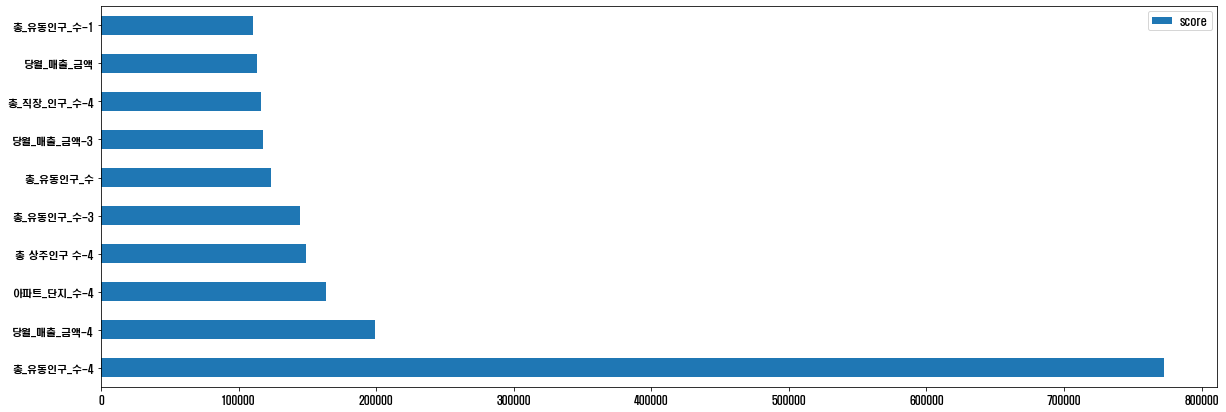

In [40]:
#feature_important = xgb_5000_강남구.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')

In [41]:
from sklearn.metrics import mean_squared_error

#rms = mean_squared_error(y_actual, y_predicted, squared=False)

RMSE = mean_squared_error(y_test, xgb_5000_강남구_pred, squared=False)

In [42]:
RMSE

1.84433932760721

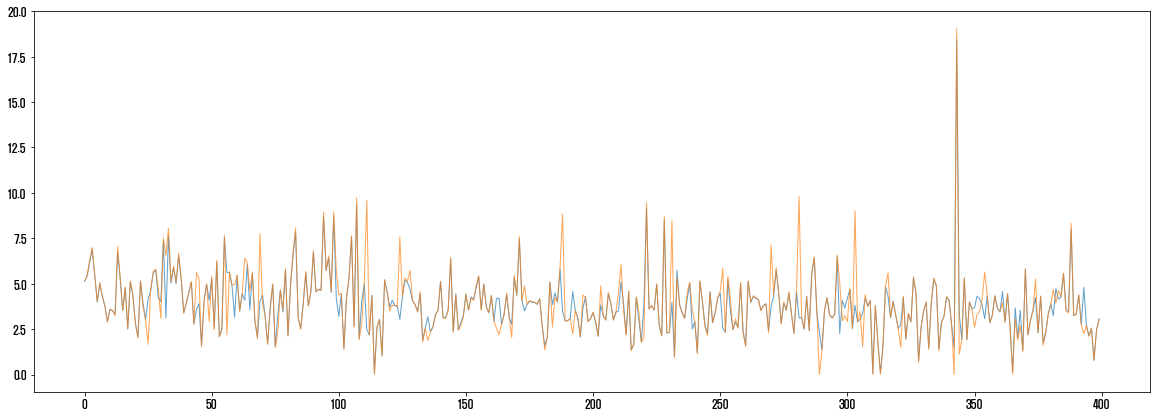

In [75]:
plt.pyplot.plot(xgb_5000_강남구.predict(x_in.astype({'상권_코드': 'int32'}))[:400],alpha = 0.7,linewidth = 1)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values[:400],alpha = 0.7,linewidth = 1)

In [72]:
len(x_out.values)

2070